## Boston Housing prices Prediction with regression 

#### Problem Statement

To predict the house prices from data collected in city of boston suburbs for the given attributes.

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import cross_val_score,GridSearchCV

# To build the models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# To evaluate the models
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics

#To impute missing values
from sklearn.impute import SimpleImputer

##### Loading the dataset from sklearn datasets

In [2]:
from sklearn.datasets import load_boston

In [3]:
house = load_boston()

In [4]:
type(house)

sklearn.utils.Bunch

In [5]:
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

#### Description of the dataset

In [6]:
print(house['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Naming the columns

In [7]:
House = pd.DataFrame(house['data'],columns=house['feature_names'])

#### Data Exploration

In [8]:
House.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Adding target varible to the dataset

In [10]:
House['price'] = house['target']

#### Looking into basic summary statistics

In [11]:
House.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Checking for null values

In [12]:
print(House.isnull().sum())
print("\n Total missing values in data :",House.isnull().values.sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

 Total missing values in data : 0


### Exploratory Data Analysis

##### Boxplots to know the spread and variability of the data

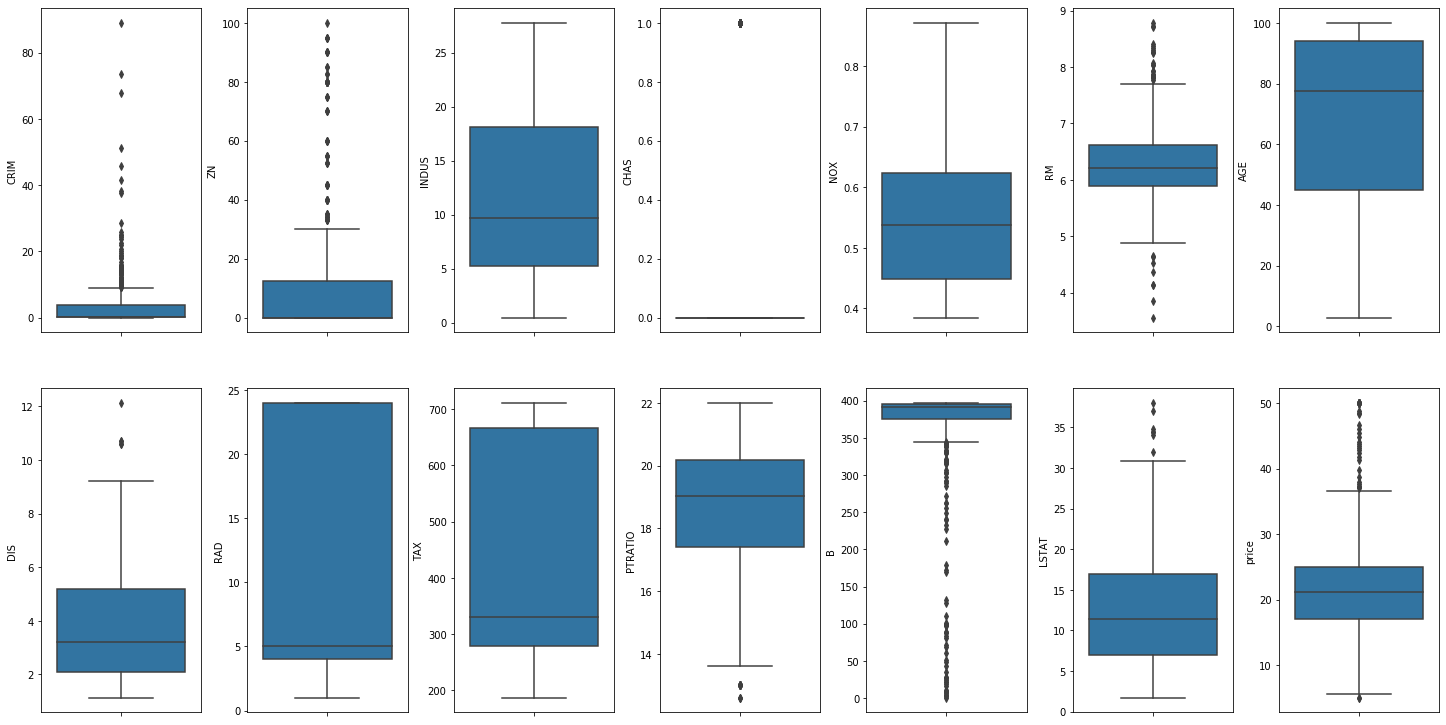

In [13]:
fig, ax = plt.subplots(2,7,figsize=(20,10))
count = 0
ax = ax.flatten()
for i in House.columns:
    sns.boxplot(y = i, data = House, ax = ax[count])
    count += 1
plt.tight_layout(pad = 0.4,w_pad = 0.6 , h_pad = 5.0)
    

In [14]:
House.shape

(506, 14)

##### Checking for outliers and removing them if necessary

In [15]:
A = []
for i in House.columns:
    Q1 = House[i].describe(percentiles=[0.25,0.75])[['25%','75%']][0]
    Q3 = House[i].describe(percentiles=[0.25,0.75])[['25%','75%']][1]
    IQR = Q3 - Q1
    L = Q1 + 1.5*IQR
    H = Q3 + 1.5*IQR
    p = House[i]
    count = House[(House[i]<L) | (House[i]>H)]
    perc = (len(House)-len(count[i]))*100/House.shape[0]
    A.append(perc)
pd.DataFrame({"columns" :House.columns,"%_outliers" : A})

,columns,%_outliers
0,CRIM,7.114625
1,ZN,10.671937
2,INDUS,2.371542
3,CHAS,93.083004
4,NOX,12.055336
5,RM,8.498024
6,AGE,0.000000
7,DIS,9.881423
8,RAD,0.000000
9,TAX,0.000000


In [16]:
boston = House[~(House['price']>=50)]
boston =boston.drop('CHAS',axis=1)

### Distribution plots

In [17]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   NOX      490 non-null    float64
 4   RM       490 non-null    float64
 5   AGE      490 non-null    float64
 6   DIS      490 non-null    float64
 7   RAD      490 non-null    float64
 8   TAX      490 non-null    float64
 9   PTRATIO  490 non-null    float64
 10  B        490 non-null    float64
 11  LSTAT    490 non-null    float64
 12  price    490 non-null    float64
dtypes: float64(13)
memory usage: 53.6 KB


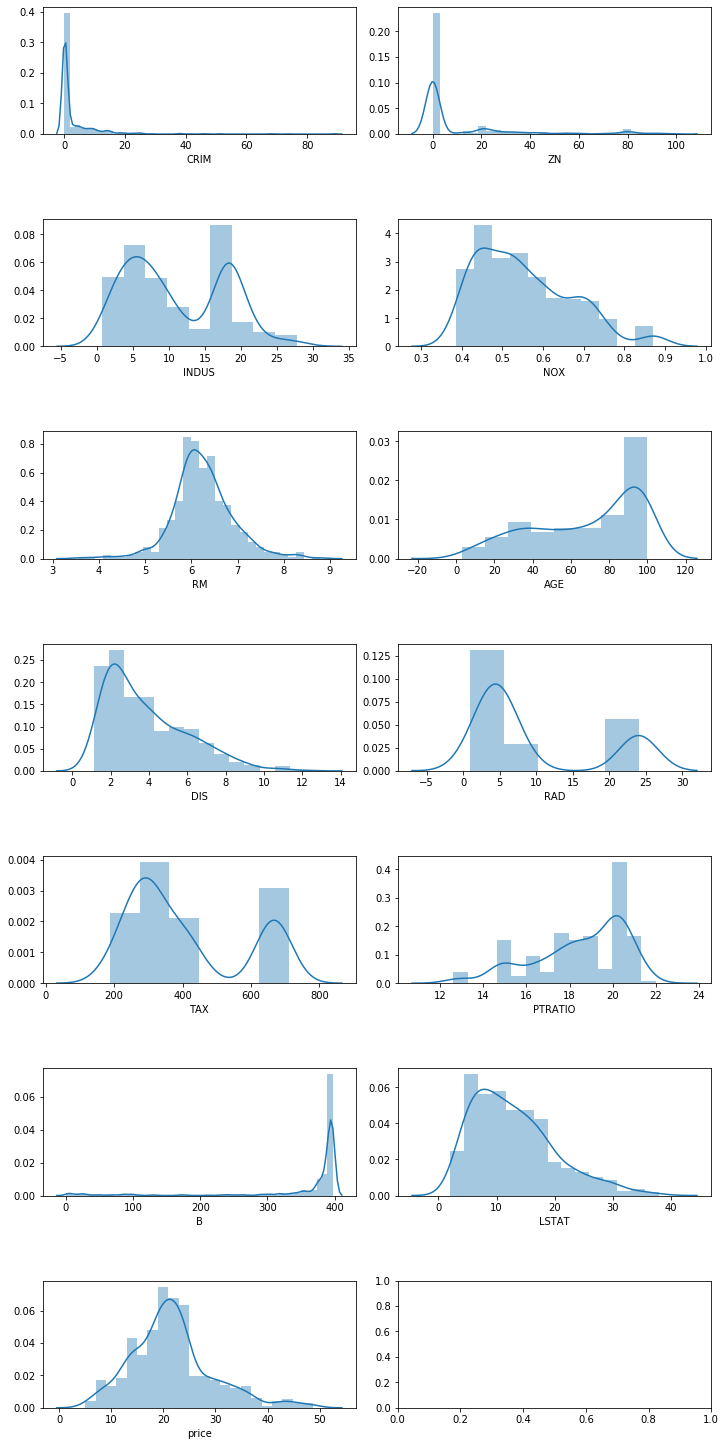

In [18]:
fig, ax = plt.subplots(7,2,figsize=(10,20))
count = 0
axs = ax.flatten()
for k,i in boston.items():
    sns.distplot(i , ax = axs[count])
    count += 1
plt.tight_layout(pad = 0.4,w_pad = 0.6 , h_pad = 5.0)

#### Observations :
     Apart from price column rest all are highly skewed and transformation of data has to be done

##### Pairplot to undarstand the relationships between the attributes

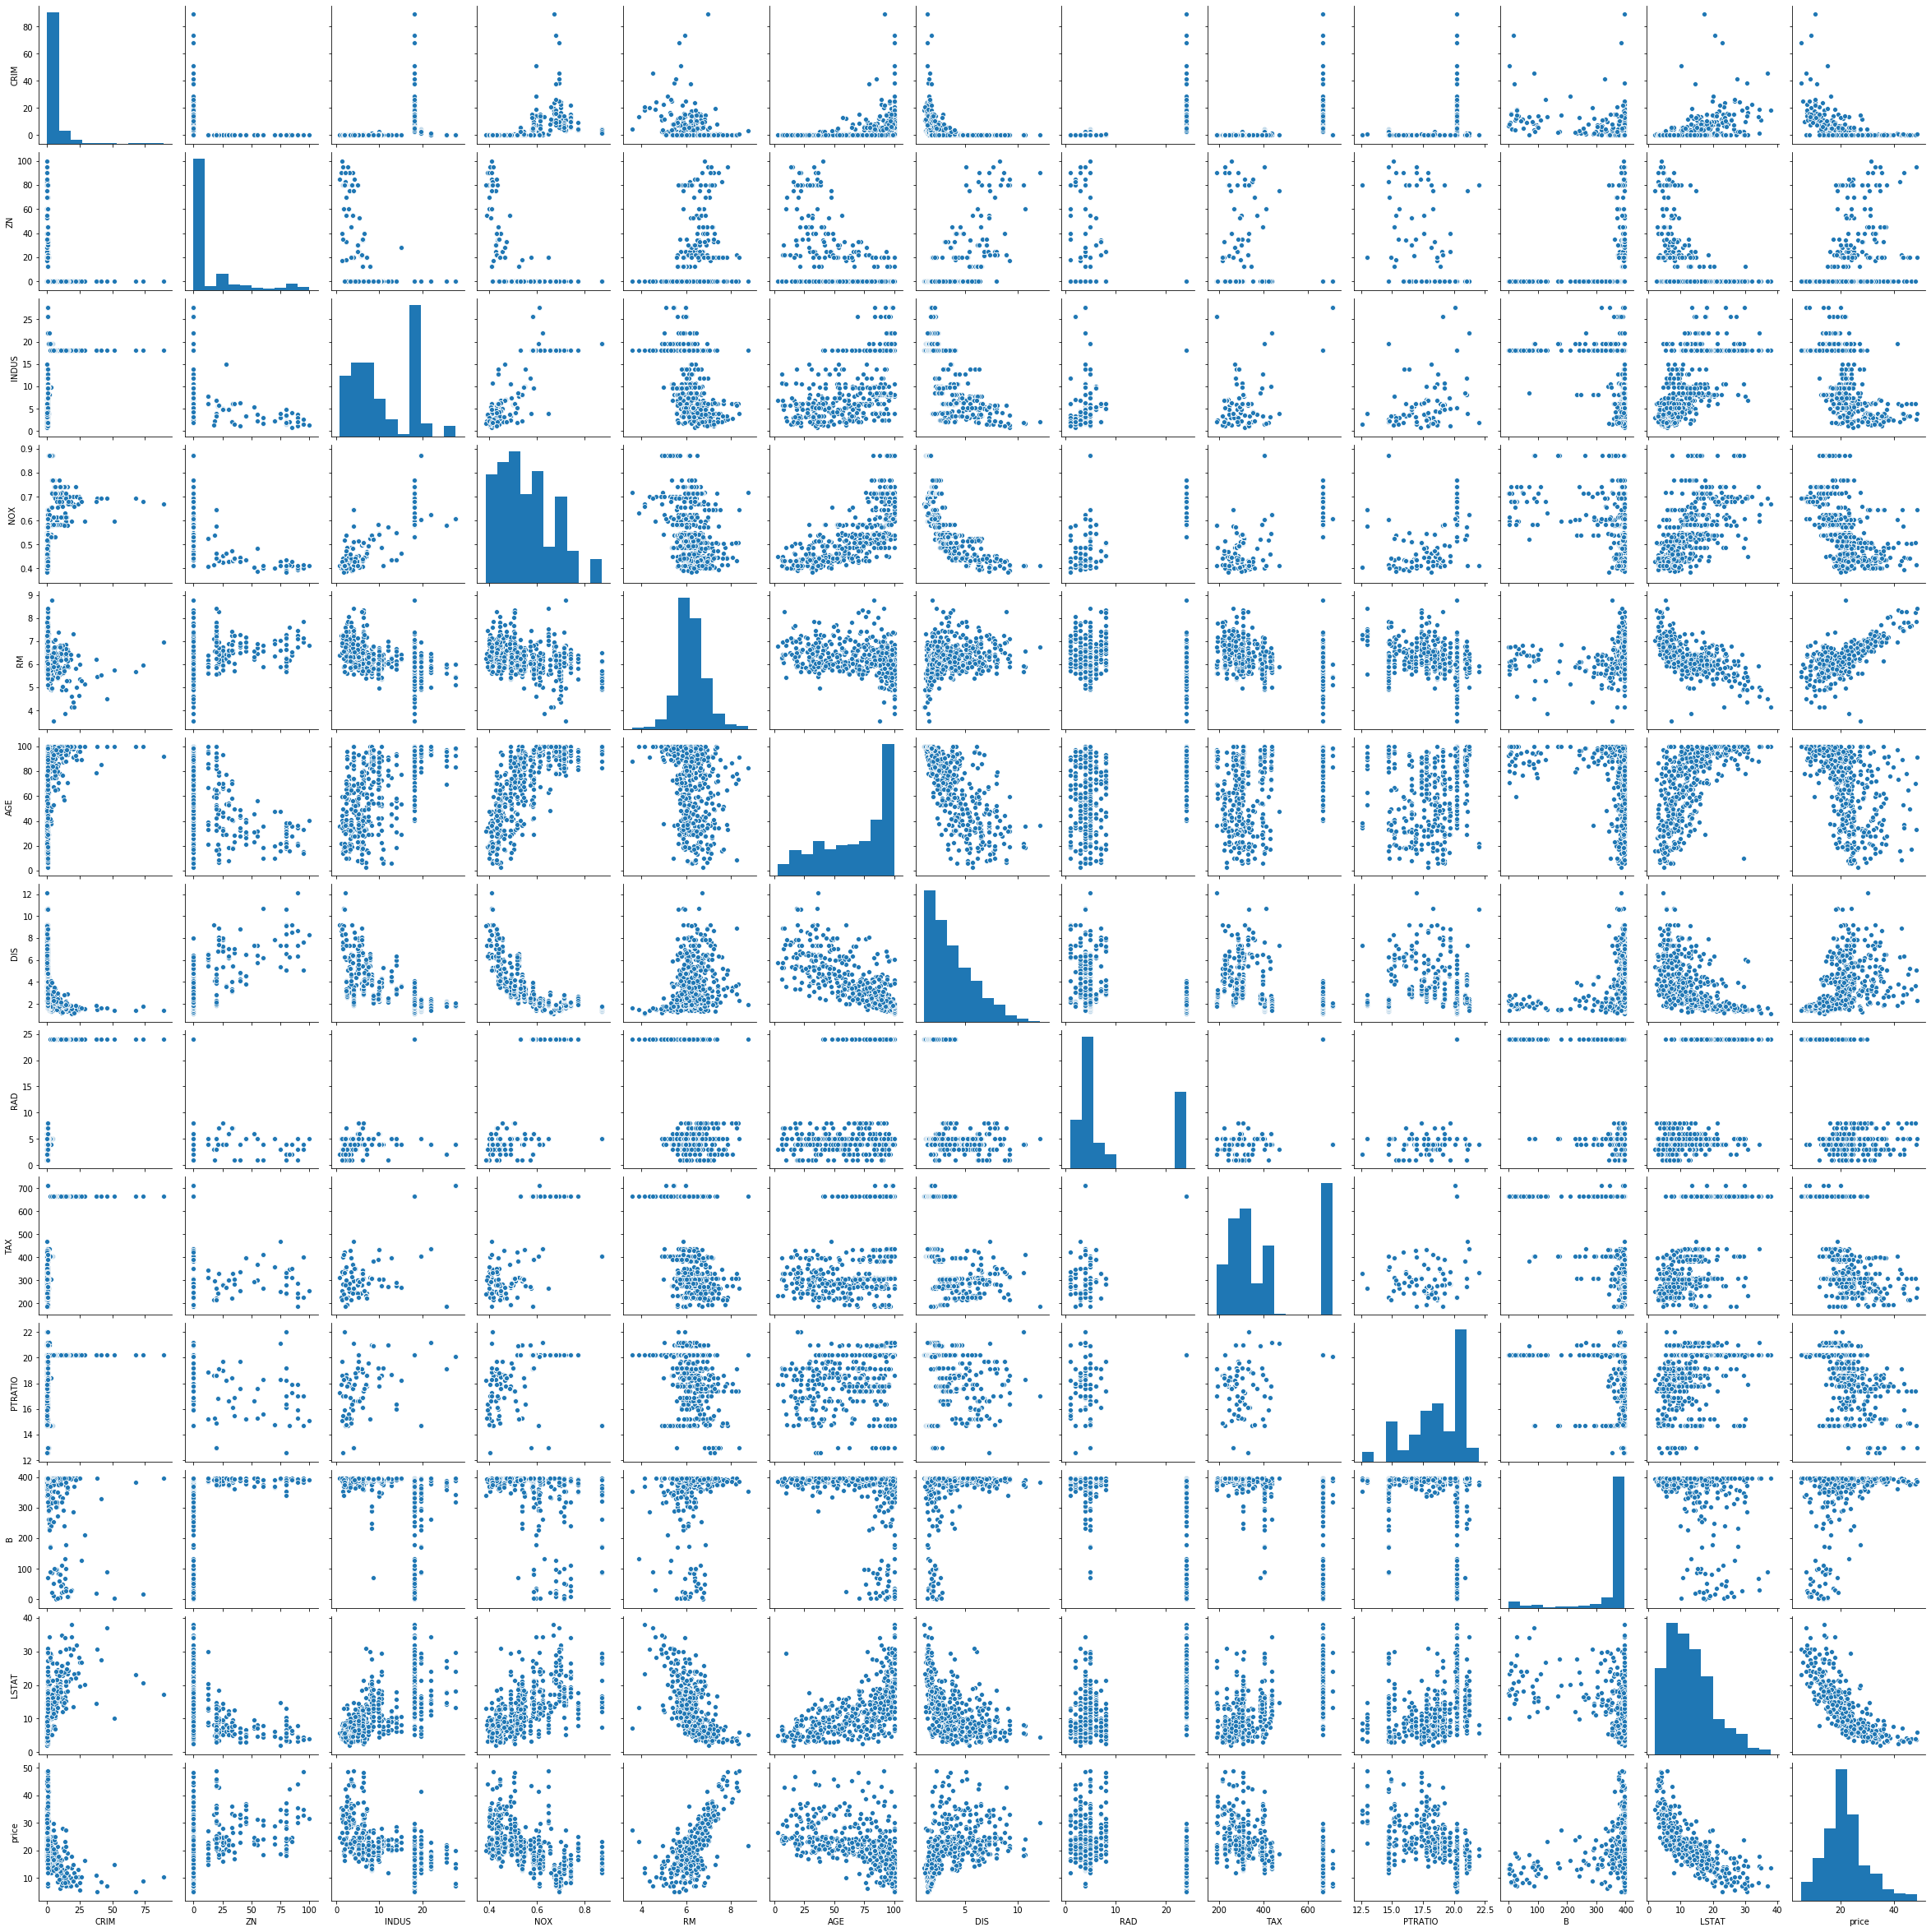

In [19]:
sns.pairplot(boston)
plt.show()

##### Heatmap

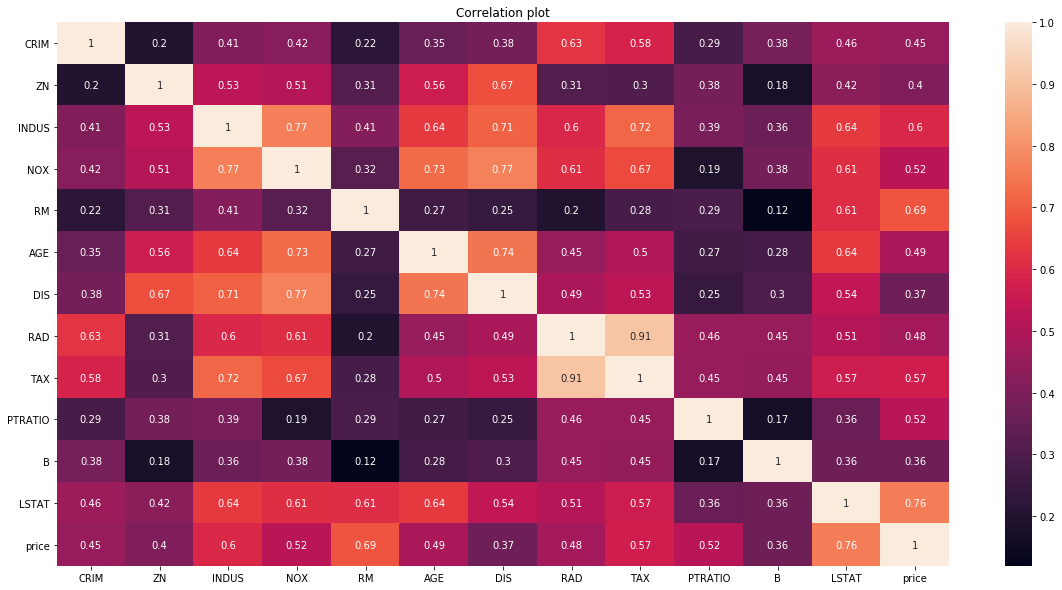

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(boston.corr().abs(),  annot=True);
ax.set_title("Correlation plot");

In [21]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

#### Observations :
1. From the above correlation plot, we can observe that "TAX" and "RAD" are highly corelated. we need to remove one column which has least explaining capability of "price"
2. Variables which explains price variable the best are 'INDUS', 'NOX', 'RM','TAX','PTRATIO','LSTAT'

##### Log transformations is applied to the data as most of them are right skewed

In [22]:
reg_bos = boston.drop('price',axis=1)
for i in reg_bos.columns:
    if np.abs(reg_bos[i].skew())>0.3:
        reg_bos[i] = np.log1p(reg_bos[i])

#### Regression plots

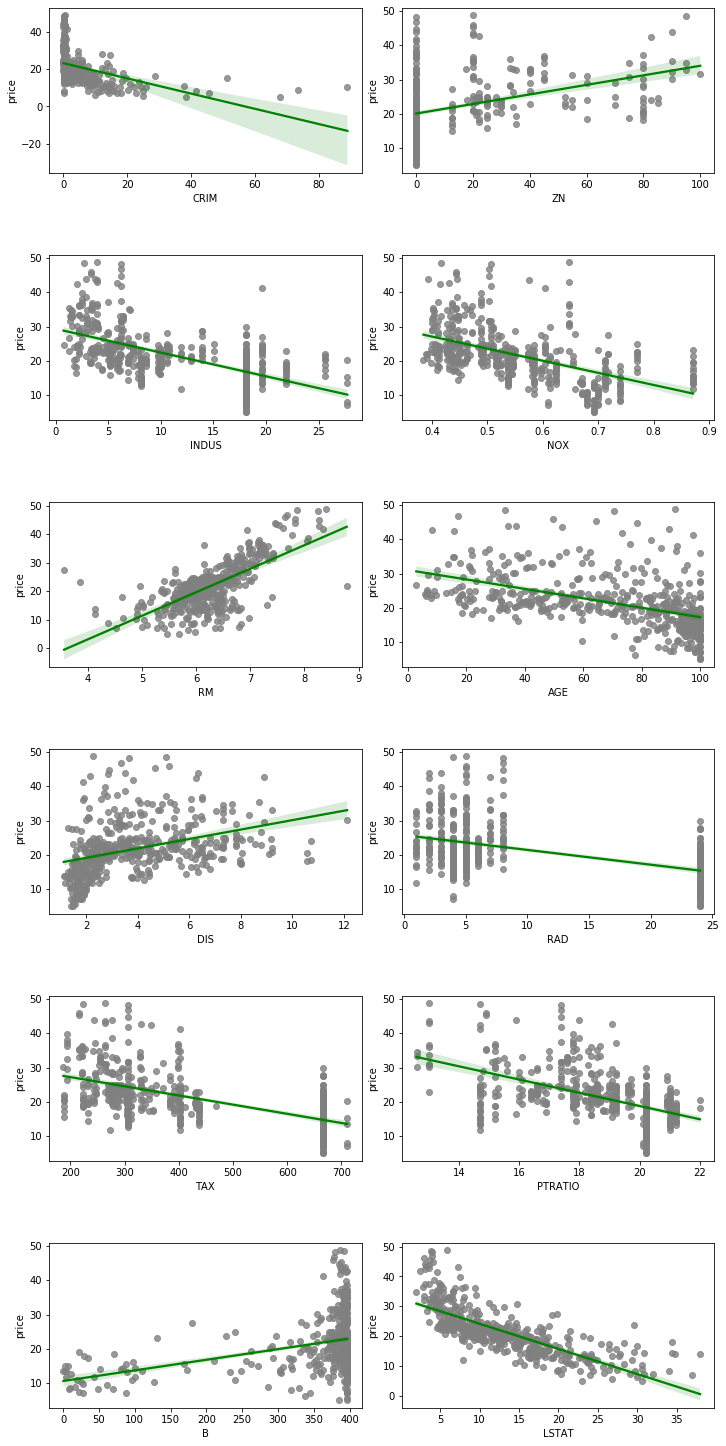

In [23]:
reg_bos1 = boston.drop('price',axis=1)
fig, ax = plt.subplots(6,2,figsize=(10,20))
k = 0
axs = ax.flatten()
for k,i in enumerate(reg_bos1.columns):
    sns.regplot(y=boston.price,x=reg_bos1[i] , ax = axs[k],scatter_kws={"color": "grey"}, line_kws={"color": "green"})
plt.tight_layout(pad = 0.4,w_pad = 0.6 , h_pad = 5.0)

In [24]:
reg_bos.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.807993,0.945104,2.304316,0.438302,6.245471,4.106534,1.488821,2.051486,5.934292,2.965147,5.753395,2.504121
std,1.028565,1.611798,0.653532,0.073398,0.653147,0.592998,0.411191,0.750655,0.393519,0.114546,0.740437,0.519290
min,0.006300,0.000000,0.553885,0.325700,3.561000,1.360977,0.759403,0.693147,5.236442,2.610070,0.277632,1.091923
25%,0.078853,0.000000,1.822935,0.370874,5.881000,3.818794,1.134960,1.609438,5.639243,2.912351,5.932013,2.121961
50%,0.221148,0.000000,2.369309,0.430483,6.185000,4.354141,1.452994,1.791759,5.802118,3.000720,5.973224,2.539631
75%,1.536265,2.602690,2.949688,0.484892,6.578000,4.552560,1.826901,3.218876,6.502790,3.054001,5.984748,2.896878
max,4.499545,4.615121,3.358290,0.626473,8.780000,4.615121,2.574633,3.218876,6.568078,3.135494,5.986201,3.662792


### Model Building
Splitting the data into train and test

In [25]:
x = reg_bos
y = boston.price

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

### Building Linear Regression model

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)

print("Intercept :",lm.intercept_)
pd.DataFrame({"labels":reg_bos.columns,"Coefficients" : lm.coef_})

Intercept : 96.41674496709568


,labels,Coefficients
0,CRIM,-1.633764
1,ZN,-0.013171
2,INDUS,-1.243250
3,NOX,-17.738198
4,RM,2.534452
5,AGE,-0.196301
6,DIS,-6.227078
7,RAD,3.154375
8,TAX,-3.745383
9,PTRATIO,-13.118253


In [28]:
scores = cross_val_score(lm,X_train,y_train,cv = 5)
print("R2 score :",scores)
print("Mean Squared Error '(MSE)' :",scores.mean(),scores.std())
print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=lm.predict(X_train)))
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=lm.predict(X_test)))

R2 score : [0.78220095 0.76111646 0.87091938 0.76357647 0.77004619]
Mean Squared Error '(MSE)' : 0.7895718913693532 0.041324255175572346

 R2 score for train : 0.8159791925704429
 R2 score for test : 0.7987033594976883


###  Support Vector Machine Regression

In [29]:
from sklearn.svm import SVR

svm = SVR(kernel='rbf',gamma=0.1)
svm.fit(X_train,y_train)
svm_scores = cross_val_score(svm,X_train,y_train,cv = 8)
print("R2 score SVM:",svm_scores*100)
print("Mean Squared Error '(MSE)' :",svm_scores.mean()*100,svm_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=svm.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=svm.predict(X_test))*100)

R2 score SVM: [68.8794868  68.11022357 62.41211603 78.98790459 69.03304052 63.39131124
 74.35105174 56.31724022]
Mean Squared Error '(MSE)' : 67.68529683998707 6.624592018252083

 R2 score for train : 74.16722073348173
 R2 score for test : 67.86934472221677


### 	KNN Regression

In [30]:
KNN = KNeighborsRegressor(n_neighbors=11)
KNN.fit(X_train,y_train)
KNN_scores = cross_val_score(KNN,X_train,y_train,cv = 8)
print("R2 score KNN:",KNN_scores*100)
print("Mean Squared Error '(MSE)' :",KNN_scores.mean()*100,KNN_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=KNN.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=KNN.predict(X_test))*100)

R2 score KNN: [75.56991464 76.30391812 74.81490652 79.16516699 80.2192808  76.03490586
 86.83578358 69.98642468]
Mean Squared Error '(MSE)' : 77.36628765045374 4.584579800723951

 R2 score for train : 83.89027785224154
 R2 score for test : 74.70513309498745


###    Decision Tree Regression

In [31]:
Tree = DecisionTreeRegressor(max_depth=4)
Tree.fit(X_train,y_train)
Tree_scores = cross_val_score(Tree,X_train,y_train,cv = 8)
print("R2 score DecisionTree:",Tree_scores*100)
print("Mean Squared Error '(MSE)' :",Tree_scores.mean()*100,Tree_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=Tree.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=Tree.predict(X_test))*100)

R2 score DecisionTree: [70.52774706 71.62403708 79.38320783 71.36308767 83.09756627 69.33649385
 82.96114968 77.42183973]
Mean Squared Error '(MSE)' : 75.71439114663437 5.322664626277686

 R2 score for train : 88.58341871334167
 R2 score for test : 81.32356979156201


### 	Random Forest Regression

In [32]:
random_reg = RandomForestRegressor(n_estimators=10,random_state=0,criterion='mse')
random_reg.fit(X_train,y_train)
random_reg_scores = cross_val_score(random_reg,X_train,y_train,cv = 8)
print("R2 score RandomForest:",random_reg_scores*100)
print("Mean Squared Error '(MSE)' :",random_reg_scores.mean()*100,random_reg_scores.std()*100)

print("\n R2 score for train :",r2_score(y_true=y_train,y_pred=random_reg.predict(X_train))*100)
print(" R2 score for test :",r2_score(y_true=y_test,y_pred=random_reg.predict(X_test))*100)

R2 score RandomForest: [81.66688405 80.47830961 91.51290599 77.76622383 86.92285983 82.44698301
 88.50149257 78.89379048]
Mean Squared Error '(MSE)' : 83.52368117362812 4.591108257680373

 R2 score for train : 97.46880806279489
 R2 score for test : 85.27337140871367


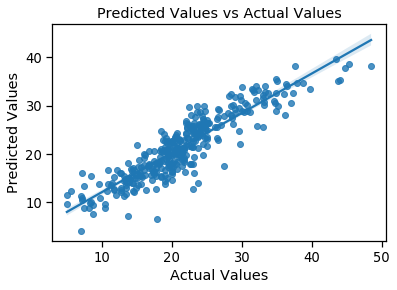

In [33]:
sns.set_context("notebook",font_scale=1.2)
ax = sns.regplot(x=y_train,y = lm.predict(X_train) );
ax.set_title("Predicted Values vs Actual Values");
plt.xlabel("Actual Values");
plt.ylabel("Predicted Values");

### Feature Importance

In [34]:
Feature_importance = pd.DataFrame({"Features":X_train.columns,"Importance":random_reg.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

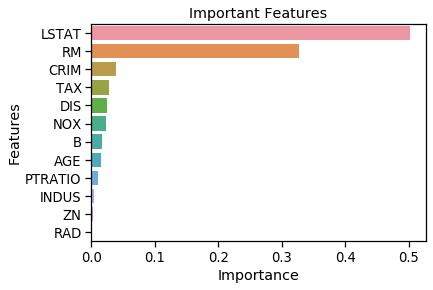

In [35]:
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");

### Conclusion :
Out all the models build above Linear regression gives the best result remaining models seems to overfit the data it clearly indicates the all the variables have strong linear relationship with the price of house in prediction.LSTAT,RM variables are important features for gthe better prediction of price of the house compared to rest of variables.